In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# a. Importe os dados em notebook e atribua à variável chipo.

In [57]:
chipo = pd.read_csv("../prj_infnet/db/chipotle.tsv", delimiter='\t')

# FUNÇÃO PARA VISUALIZAR, CONTABILIZAR E REMOVER DAS ANÁLISES CAMPOS NaN

In [58]:
def nan_count(chipo):
    cont_nan = chipo.isna().sum()
    return(cont_nan)

In [59]:
teste = nan_count(chipo)
print(teste)

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


# b. Selecione e mostre as 10 primeiras entradas.

In [60]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# c. Quantas observações estão presentes neste DataSet?

In [81]:
chipo.shape[0]

4622

# d. Qual o número de colunas neste DataSet?

In [61]:
cont_cols = chipo.shape[1]
print(f"Aqui está o número de colunas do DataSet:", cont_cols)

Aqui está o número de colunas do DataSet: 5


# e. Qual o nome de todas as colunas deste DataSet?

In [62]:
col_name = chipo.columns
col_name = ' , '.join(col_name)
print(f"Aqui estão os nomes das colunas: ", col_name)

Aqui estão os nomes das colunas:  order_id , quantity , item_name , choice_description , item_price


# f. Qual o produto mais pedido? Quantas vezes ele foi pedido?

In [63]:
mais_pedido = chipo.groupby('item_name')['quantity'].sum()
mais_pedido = mais_pedido.sort_values(ascending=False)
print(f"Aqui está o item mais vendido: ", mais_pedido.head(1))

Aqui está o item mais vendido:  item_name
Chicken Bowl    761
Name: quantity, dtype: int64


# g. Qual foi o pedido mais pedido dentro da coluna choice_description?

In [64]:
mais_pedido_p = chipo.groupby('choice_description')['quantity'].sum()
mais_pedido_p = mais_pedido_p.sort_values(ascending=False)
print(f"Aqui está o pedido mais pedido: ", mais_pedido_p.head(1))

Aqui está o pedido mais pedido:  choice_description
[Diet Coke]    159
Name: quantity, dtype: int64


# h. Quantos itens foram pedidos no total?

In [65]:
soma_mais_pedidos = mais_pedido.sum(skipna=True)+(mais_pedido_p.sum(skipna=True))
print(f"O total d eitens pedidos foram:", soma_mais_pedidos)

O total d eitens pedidos foram: 8562


In [66]:
chipo_combinado = pd.concat([mais_pedido, mais_pedido_p], axis=1).reset_index()
chipo_combinado.columns = ['Item', 'Quantidade_Pedido', 'Quantidade_Pedido_P']
chipo_combinado['Total_Quantidade'] = chipo_combinado['Quantidade_Pedido'].fillna(0) + chipo_combinado['Quantidade_Pedido_P'].fillna(0)
chipo_ordenado = chipo_combinado.sort_values(by='Total_Quantidade', ascending=False)

top_10_itens = chipo_ordenado.head(10)

print("Aqui está a lista com os 10 itens mais pedidos: \n")
for index, row in top_10_itens.iterrows():
    item = row['Item']
    quantidade = row['Total_Quantidade']
    print(f"Item: {item}, Quantidade Total: {quantidade}")

Aqui está a lista com os 10 itens mais pedidos: 

Item: Chicken Bowl, Quantidade Total: 761.0
Item: Chicken Burrito, Quantidade Total: 591.0
Item: Chips and Guacamole, Quantidade Total: 506.0
Item: Steak Burrito, Quantidade Total: 386.0
Item: Canned Soft Drink, Quantidade Total: 351.0
Item: Chips, Quantidade Total: 230.0
Item: Steak Bowl, Quantidade Total: 221.0
Item: Bottled Water, Quantidade Total: 211.0
Item: [Diet Coke], Quantidade Total: 159.0
Item: [Coke], Quantidade Total: 143.0


# i. Qual foi o valor recebido para o período representado nessa base de dados?

In [67]:
# O CAMPO VALOR ESTÁ COMO STRING E PARA OBTERMOS O SOMATÓRIO PRECISAMOS PRIMEIRO REMOVER O CARACTER $ E FORMATAR OS NÚMEROS COMO FLOAT.

chipo['item_price'] = chipo['item_price'].str.replace('$','').astype(float)
total_vendas = chipo['item_price'].sum()
print(f'Total de vendas: R$ {total_vendas:.2f}')

Total de vendas: R$ 34500.16


# j. Qual a média do valor recebido por pedido?

In [68]:
pedidos = chipo.groupby('order_id')['item_price'].sum().mean()
media = pedidos.mean()
print(f'Aqui está a média do valor recebido por pedido: R$ {media:.2f}')

Aqui está a média do valor recebido por pedido: R$ 18.81


# k. Quantos itens diferentes estão esgotados?

In [69]:
# buscando itens esgotados
itens_esgotados = chipo[chipo['choice_description'].isna()]['item_name'].unique()
# criando um dic para armazenar esses itens
dic_esgotados = chipo[chipo['item_name'].isin(itens_esgotados)]
esgotados = dic_esgotados.groupby('item_name')['choice_description'].unique()

for item, descricao in esgotados.items():
    print(f'Item: {item}, Descrições Esgotadas: {descricao}')

Item: Bottled Water, Descrições Esgotadas: [nan]
Item: Chips, Descrições Esgotadas: [nan]
Item: Chips and Fresh Tomato Salsa, Descrições Esgotadas: [nan]
Item: Chips and Guacamole, Descrições Esgotadas: [nan]
Item: Chips and Mild Fresh Tomato Salsa, Descrições Esgotadas: [nan]
Item: Chips and Roasted Chili Corn Salsa, Descrições Esgotadas: [nan]
Item: Chips and Roasted Chili-Corn Salsa, Descrições Esgotadas: [nan]
Item: Chips and Tomatillo Green Chili Salsa, Descrições Esgotadas: [nan]
Item: Chips and Tomatillo Red Chili Salsa, Descrições Esgotadas: [nan]
Item: Chips and Tomatillo-Green Chili Salsa, Descrições Esgotadas: [nan]
Item: Chips and Tomatillo-Red Chili Salsa, Descrições Esgotadas: [nan]
Item: Side of Chips, Descrições Esgotadas: [nan]


# l. Quantos produtos custam mais de $10?

In [70]:
maior_10_itens = chipo.groupby('item_name')['item_price'].sum()
maior_10_qtd = len(maior_10_itens)
print(f"Aqui está a quantidade de itens que tem o seu valor maior que $ 10", maior_10_qtd)

Aqui está a quantidade de itens que tem o seu valor maior que $ 10 50


# m. Qual o preço para cada um deles?

In [71]:
maior_10_itens = chipo.groupby('item_name')['item_price'].sum()
print(f"Aqui estão os nomes dos produtos que tem o valor maior que $10 ordenados em ordem alfabética:\n", maior_10_itens)

Aqui estão os nomes dos produtos que tem o valor maior que $10 ordenados em ordem alfabética:
 item_name
6 Pack Soft Drink                         356.95
Barbacoa Bowl                             672.36
Barbacoa Burrito                          894.75
Barbacoa Crispy Tacos                     120.21
Barbacoa Salad Bowl                       106.40
Barbacoa Soft Tacos                       250.46
Bottled Water                             302.56
Bowl                                       29.60
Burrito                                    44.40
Canned Soda                               137.34
Canned Soft Drink                         438.75
Carnitas Bowl                             736.71
Carnitas Burrito                          597.83
Carnitas Crispy Tacos                      77.96
Carnitas Salad                              8.99
Carnitas Salad Bowl                        66.34
Carnitas Soft Tacos                       375.94
Chicken Bowl                             7342.73
Chicken Burri

# n.Ordene os itens que custam mais de $10 por ordem alfabética.

In [72]:
maior_10_itens = chipo.groupby('item_name')['item_price'].sum()
maior_10_itens = maior_10_itens.sort_index()
print(f"Aqui estão os nomes dos produtos que têm o valor maior que $10:\n", maior_10_itens)

Aqui estão os nomes dos produtos que têm o valor maior que $10:
 item_name
6 Pack Soft Drink                         356.95
Barbacoa Bowl                             672.36
Barbacoa Burrito                          894.75
Barbacoa Crispy Tacos                     120.21
Barbacoa Salad Bowl                       106.40
Barbacoa Soft Tacos                       250.46
Bottled Water                             302.56
Bowl                                       29.60
Burrito                                    44.40
Canned Soda                               137.34
Canned Soft Drink                         438.75
Carnitas Bowl                             736.71
Carnitas Burrito                          597.83
Carnitas Crispy Tacos                      77.96
Carnitas Salad                              8.99
Carnitas Salad Bowl                        66.34
Carnitas Soft Tacos                       375.94
Chicken Bowl                             7342.73
Chicken Burrito                          55

# o. Quantas vezes o item mais caro foi pedido?

In [73]:
mais_caro = maior_10_itens.idxmax()
mais_caro_mais_pedido = chipo[chipo['item_name'] == mais_caro]
qtd_pedidos = len(mais_caro_mais_pedido)

print(f"O item mais caro {mais_caro} foi pedido {qtd_pedidos} vezes")

O item mais caro Chicken Bowl foi pedido 726 vezes


# p. Quantas vezes uma Veggie Salad Bowl foi pedida?

In [74]:
# veggie_bowl = chipo['item_name'].idxmax()
veggiebowl = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
qtd_pedidos = len(veggiebowl)

print(f"O item {'Veggie Salad Bowl'} foi pedido {qtd_pedidos} vezes")

O item Veggie Salad Bowl foi pedido 18 vezes


# q. Crie um histograma com os 5 produtos mais pedidos.

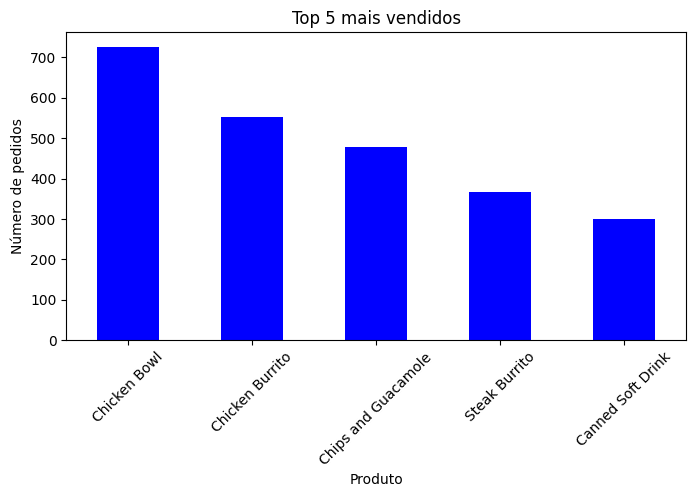

In [75]:
mais_pedidos = chipo['item_name'].value_counts()
top5 = mais_pedidos.head(5)

plt.figure(figsize=(8, 4))
top5.plot(kind='bar', color='blue')
plt.title('Top 5 mais vendidos')
plt.xlabel('Produto')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45)
plt.show()

# r. Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto.

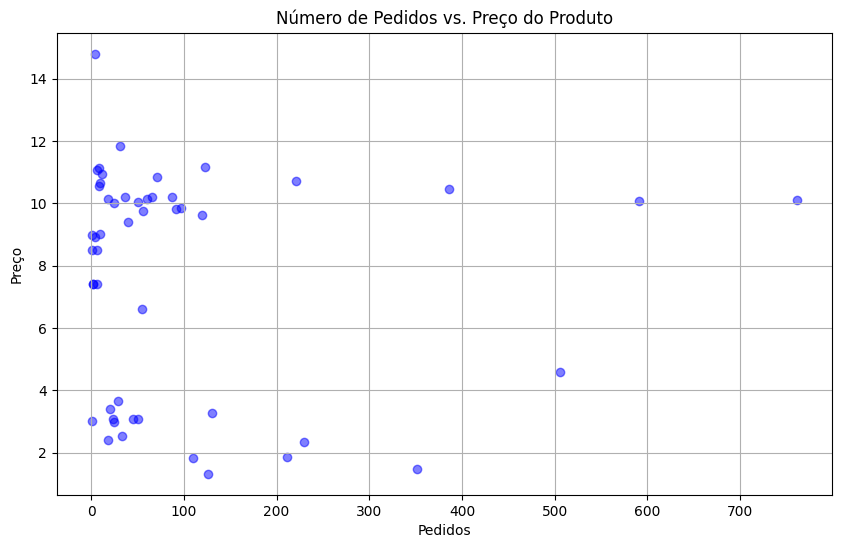

In [76]:
prods = chipo.groupby('item_name').agg({'quantity': 'sum', 'item_price': 'mean'})

plt.figure(figsize=(10, 6))
plt.scatter(prods['quantity'], prods['item_price'], alpha=0.5, color='blue')
plt.title('Número de Pedidos vs. Preço do Produto')
plt.xlabel('Pedidos')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

# s. Baseado no gráfico gerado, os dois eixos estão correlacionados? Justifique.

In [82]:
chipo['item_price'].corr(chipo['quantity'])

0.2639810066028455